![image](https://analyticsindiamag.com/wp-content/uploads/2020/04/Screenshot-2020-04-15-at-10.08.12-AM.png)

## Business Problem Understanding

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

- Each row in the data provides relavant information about the patient.

## Attribute Information
- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



## Data Collection/Data Import

## Importing Necessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data From CSV File Using Pandas

In [3]:
df = pd.read_csv("stroke_data.csv")

## Data Understanding:

### Print the first five rows of the pandas dataframe

In [4]:
## write your code here
df.head()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1


## Print the last five rows of the pandas dataframe

In [5]:
## write your code here
df.tail()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
5130,46373,Female,57.0,1.67640,72.506178,169.97,25.8,never smoked,0,0,Yes,Private,Rural,0
5131,40112,Female,37.0,1.92024,92.551774,118.41,25.1,never smoked,0,0,No,Private,Urban,0
5132,32240,Female,27.0,1.82880,139.131593,93.55,41.6,never smoked,0,0,No,Private,Urban,0
5133,69312,Female,48.0,1.58496,78.377464,99.29,31.2,never smoked,0,0,Yes,Self-employed,Urban,0
5134,25763,Female,23.0,1.64592,76.666190,98.66,28.3,Unknown,0,0,No,Private,Urban,0


## What is the shape of the dataset?

In [6]:
## write your code here
df.shape

(5135, 14)

## What are the name of the columns in the dataframe?

In [7]:
## write your code here
df.columns

Index(['id', 'gender', 'age', 'height_in_m', 'weight_in_kg',
       'avg_glucose_level', 'bmi', 'smoking_status', 'hypertension',
       'heart_disease', 'ever_married', 'work_type', 'Residence_type',
       'stroke'],
      dtype='object')

### What are the datatypes of each feature in the dataset?

In [8]:
## write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5135 entries, 0 to 5134
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5135 non-null   int64  
 1   gender             5135 non-null   object 
 2   age                5135 non-null   float64
 3   height_in_m        5135 non-null   float64
 4   weight_in_kg       4934 non-null   float64
 5   avg_glucose_level  5135 non-null   float64
 6   bmi                4934 non-null   float64
 7   smoking_status     5135 non-null   object 
 8   hypertension       5135 non-null   int64  
 9   heart_disease      5135 non-null   int64  
 10  ever_married       4933 non-null   object 
 11  work_type          5135 non-null   object 
 12  Residence_type     5135 non-null   object 
 13  stroke             5135 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 561.8+ KB


In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
height_in_m          float64
weight_in_kg         float64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
stroke                 int64
dtype: object

## Descriptive Statistics

Descriptive statistics involve a set of summary measures that provide a snapshot of the dataset's characteristics. These measures help us understand the distribution, central tendency, and variability within the data.

- Mean: The average value of the data.
- Median: The middle value when the data is sorted.
- Mode: The most frequently occurring value.
- Range: The difference between the maximum and minimum values.
- Standard Deviation: A more interpretable measure of data spread.
These statistics provide a preliminary understanding of the dataset, which is valuable for subsequent analysis and decision-making.



### How to see the descriptive statistics of a dataset?

In [10]:
## write your code here?
df.describe()

,id,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,hypertension,heart_disease,stroke
count,5135.000000,5135.000000,5135.000000,4934.000000,5135.000000,4934.000000,5135.000000,5135.000000,5135.000000
mean,36510.305940,43.237390,1.751992,89.172256,101.383180,28.899959,0.097176,0.053944,0.048491
std,21153.824243,22.601553,0.132236,27.910274,34.605155,7.847094,0.296226,0.225928,0.214822
min,67.000000,0.080000,1.524000,32.516064,55.120000,10.300000,0.000000,0.000000,0.000000
25%,17757.000000,25.000000,1.645920,69.416594,77.285000,23.500000,0.000000,0.000000,0.000000
50%,36896.000000,45.000000,1.737360,85.357641,91.850000,28.100000,0.000000,0.000000,0.000000
75%,54631.500000,61.000000,1.859280,104.671347,113.985000,33.100000,0.000000,0.000000,0.000000
max,72940.000000,82.000000,1.981200,348.548423,271.740000,97.600000,1.000000,1.000000,1.000000


## How to select gender column from the pandas dataframe?

In [11]:
## write your code here
df['gender']
df.gender

0         Male
1       Female
2         Male
3       Female
4       female
         ...  
5130    Female
5131    Female
5132    Female
5133    Female
5134    Female
Name: gender, Length: 5135, dtype: object

### How to select multiple columns : age, gender and bmi?

In [13]:
## write your code here
df[['age', 'gender', 'bmi']]

,age,gender,bmi
0,67.0,Male,36.6
1,61.0,Female,NaN
2,80.0,Male,32.5
3,49.0,Female,34.4
4,79.0,female,24.0
...,...,...,...
5130,57.0,Female,25.8
5131,37.0,Female,25.1
5132,27.0,Female,41.6
5133,48.0,Female,31.2


## How to select the 7th row of the pandas dataframe?


In [14]:
## write your code here
df.iloc[6,:]

id                          53882
gender                       Male
age                          74.0
height_in_m               1.88976
weight_in_kg            97.850684
avg_glucose_level           70.09
bmi                          27.4
smoking_status       never smoked
hypertension                    1
heart_disease                   1
ever_married                  Yes
work_type                 Private
Residence_type              Rural
stroke                          1
Name: 6, dtype: object

## How to select the 4th column from the pandas dataframe?


In [15]:
## write your code here
df.iloc[:,3]

0       1.82880
1       1.64592
2       1.79832
3       1.92024
4       1.85928
         ...   
5130    1.67640
5131    1.92024
5132    1.82880
5133    1.58496
5134    1.64592
Name: height_in_m, Length: 5135, dtype: float64

## How to select 20th to 30th row and 3rd to 7th column in pandas dataframe?

In [16]:
## write your code here
df.iloc[19:30,2:6]

,age,height_in_m,weight_in_kg,avg_glucose_level
19,57.0,1.85928,NaN,169.35
20,71.0,1.85928,77.435055,169.35
21,52.0,1.95072,186.079587,169.35
22,79.0,1.55448,64.276455,169.35
23,82.0,1.55448,78.533262,169.35
24,71.0,1.92024,100.295149,102.87
25,80.0,1.95072,89.424750,104.12
26,65.0,1.88976,100.707639,100.98
27,58.0,1.64592,NaN,169.35
28,69.0,1.88976,101.064758,169.35


## How to select 3rd and 100th row & 4th and 10th column in a pandas dataframe?

In [17]:
## write your code here
df.iloc[[2, 99], [3, 9]]

,height_in_m,heart_disease
2,1.79832,1
99,1.92024,0


## Select only those rows with gender 'Male'

In [18]:
## write your code here
# df.loc[df['gender']== "Male", ]
df[df['gender'] == "Male"]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
5,56669,Male,81.0,1.79832,93.784690,169.35,29.0,formerly smoked,0,0,Yes,Private,Urban,1
6,53882,Male,74.0,1.88976,97.850684,70.09,27.4,never smoked,1,1,Yes,Private,Rural,1
13,8213,Male,78.0,1.52400,NaN,169.35,NaN,Unknown,0,1,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,26242,Male,6.0,1.55448,48.328161,83.28,20.0,Unknown,0,0,NaN,children,Urban,0
5121,20973,Male,45.0,1.73736,114.398109,86.99,37.9,never smoked,0,0,Yes,Govt_job,Rural,0
5122,62793,Male,37.0,1.95072,95.893775,79.56,25.2,never smoked,0,0,Yes,Private,Urban,0
5125,64520,Male,68.0,1.61544,106.473573,91.68,40.8,Unknown,0,0,Yes,Self-employed,Urban,0


## Select all those rows which have avg_glucose_level greater than 100 and columns gender, age, bmi and avg_glucose_level

In [19]:
#select garda loc use garna parxa coz loc can accept boolean data but iloc cant

In [20]:
df.loc[df['avg_glucose_level']>100,['gender', 'age', 'bmi', 'avg_glucose_level']]

,gender,age,bmi,avg_glucose_level
0,Male,67.0,36.6,169.35
1,Female,61.0,NaN,169.35
2,Male,80.0,32.5,105.92
3,Female,49.0,34.4,169.35
4,female,79.0,24.0,169.35
...,...,...,...,...
5110,Female,39.0,26.6,102.51
5123,Female,18.0,23.2,112.33
5126,Female,36.0,23.2,100.33
5130,Female,57.0,25.8,169.97


In [21]:
df['gender'].str.lower()

0         male
1       female
2         male
3       female
4       female
         ...  
5130    female
5131    female
5132    female
5133    female
5134    female
Name: gender, Length: 5135, dtype: object

## Select all those Females who are greater than 50 years old?

In [22]:
df.loc[(df['gender'].str.lower()=='female') & (df['age']>=50)]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1
7,10434,Female,69.0,1.61544,59.499938,94.39,22.8,never smoked,0,0,No,Private,Urban,1
8,27419,Female,59.0,1.85928,NaN,76.15,NaN,Unknown,0,0,Yes,Private,Rural,1
9,60491,Female,78.0,1.98120,94.988713,58.57,24.2,Unknown,0,0,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,44873,Female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5115,9160,Female,80.0,1.73736,78.478914,90.77,26.0,never smoked,1,0,Yes,Private,Urban,0
5124,27705,Female,82.0,1.79832,105.103532,88.60,32.5,Unknown,0,1,Yes,Self-employed,Rural,0
5127,23989,Female,62.0,1.73736,98.400484,86.40,32.6,smokes,0,0,Yes,Self-employed,Urban,0


## Find those females who smokes

In [23]:
df.loc[(df['gender'].str.lower()=='female')&(df['smoking_status']=='smokes')]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
11,12095,Female,61.0,1.64592,99.693137,120.46,36.8,smokes,0,1,Yes,Govt_job,Rural,1
12,12175,Female,54.0,1.88976,97.493565,104.51,27.3,smokes,0,0,Yes,Private,Urban,1
20,70630,Female,71.0,1.85928,77.435055,169.35,22.4,smokes,0,0,Yes,Govt_job,Rural,1
49,36338,Female,39.0,1.85928,135.511347,58.09,39.2,smokes,1,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,24552,Female,44.0,1.70688,109.253975,72.03,37.5,smokes,0,0,Yes,Private,Rural,0
5093,32235,Female,45.0,1.58496,NaN,95.02,NaN,smokes,1,0,Yes,Govt_job,Rural,0
5110,26605,Female,39.0,1.61544,69.416594,102.51,26.6,smokes,0,0,Yes,Private,Rural,0
5117,23633,Female,37.0,1.82880,140.803847,83.65,42.1,smokes,0,0,Yes,Private,Rural,0


## Data Wrangling

- Data Inspection
  - Checking Duplicate Enties
  - Checking Missing Values
  - Checking standard format
  - Checking data entry typos and errors
- Data Cleaning
  - Removing Duplicates
  - Handling Missing Values
  - Standardizing Formats
  - Correcting Errors
- Data Transformation
  - Feature Engineering
  - Normalization/Scaling
  - One-Hot Encoding
- Data Integration
- Data Reduction
- Data Formatting
- Data Enrichment
- Data Validation
- Documentation
- Exploratory Data Analysis (EDA)


### Checking Duplicate Entries
- Check if duplicate entries are present or not.
- If present find how many of duplicate entries are there?

In [25]:
## write your code here
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5130     True
5131     True
5132     True
5133     True
5134     True
Length: 5135, dtype: bool

In [29]:
#or if we want to see the entire data of duplicates then
print(df.loc[df.duplicated()].shape)
df.loc[df.duplicated()]

(25, 14)


,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
5110,26605,Female,39.0,1.61544,69.416594,102.51,26.6,smokes,0,0,Yes,Private,Rural,0
5111,5236,Female,49.0,1.73736,99.607852,73.48,33.0,never smoked,0,0,Yes,Private,Rural,0
5112,11709,Male,71.0,1.55448,76.116854,95.08,31.5,never smoked,0,0,No,Private,Urban,0
5113,53695,Male,70.0,1.95072,103.504392,81.59,27.2,never smoked,0,0,Yes,Govt_job,Urban,0
5114,68596,Female,19.0,1.85928,97.485204,58.39,28.2,never smoked,0,0,No,Private,Urban,0
5115,9160,Female,80.0,1.73736,78.478914,90.77,26.0,never smoked,1,0,Yes,Private,Urban,0
5116,26474,Female,44.0,1.67640,93.021491,97.16,33.1,Unknown,0,0,Yes,Govt_job,Urban,0
5117,23633,Female,37.0,1.82880,140.803847,83.65,42.1,smokes,0,0,Yes,Private,Rural,0
5118,53998,Female,21.0,1.64592,84.793348,58.66,31.3,never smoked,0,0,No,Private,Urban,0
5119,26242,Male,6.0,1.55448,48.328161,83.28,20.0,Unknown,0,0,NaN,children,Urban,0


## Remove Duplicate Entries

- Remove all those rows which has duplicate entries

In [30]:
#to remove duplicates we write
# df=df.drop_duplicates()
#or
print(df.shape,"before removing duplicates")
df=df[~df.duplicated()]
print(df.shape,"After removing duplicates")

(5135, 14) before removing duplicates
(5110, 14) After removing duplicates


In [31]:
## write your code here
df

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1.73736,NaN,83.75,NaN,never smoked,1,0,Yes,Private,Urban,0
5106,44873,Female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5107,19723,Female,35.0,1.82880,102.341989,82.99,30.6,never smoked,0,0,Yes,Self-employed,Rural,0
5108,37544,Male,51.0,1.82880,85.619442,166.29,25.6,formerly smoked,0,0,Yes,Private,Rural,0


In [ ]:
## write your code here


## Checking Missing Values
- Find missing values (NAN) values in the datasets
- Find columns which has missing values with their frequency

In [39]:
#to see the rows with missing values,
#this is not done as it gives all the rows as if all have missing values
df.isnull()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,True,False,True,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
## write your code here
df.isnull().sum()

id                     0
gender                 0
age                    0
height_in_m            0
weight_in_kg         201
avg_glucose_level      0
bmi                  201
smoking_status         0
hypertension           0
heart_disease          0
ever_married         201
work_type              0
Residence_type         0
stroke                 0
dtype: int64

## Visualize missing values using heatmaps

<Axes: >

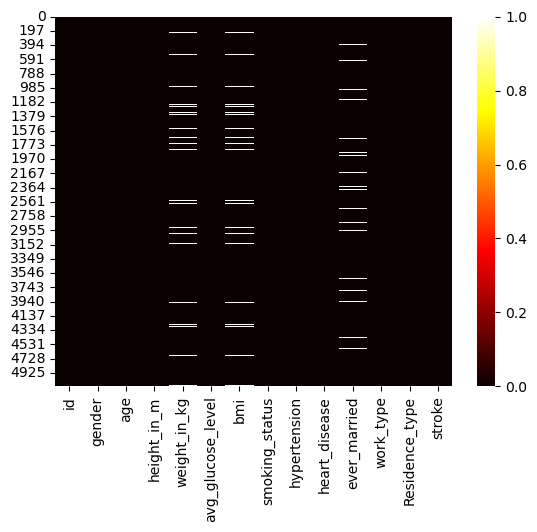

In [41]:
## write your code here
sns.heatmap(df.isnull(), cmap = 'hot')

## Handling Missing Values

- Handle missing values for ever_married column, avg_glucose_level and weight_in_kg column
- missing values can be handled by replacing with mean, median or simply dropping the null values
- for replacing with mean, the distribution should be normal distribution
- Median imputation is appropriate when the distribution of the data is skewed
- Mode imputation is used when dealing with categorical data

for weight in kg column

In [45]:
#to see which has weight null
df.loc[df['weight_in_kg'].isnull()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
8,27419,Female,59.0,1.85928,NaN,76.15,NaN,Unknown,0,0,Yes,Private,Rural,1
13,8213,Male,78.0,1.52400,NaN,169.35,NaN,Unknown,0,1,Yes,Private,Urban,1
19,25226,Male,57.0,1.85928,NaN,169.35,NaN,Unknown,0,1,No,Govt_job,Urban,1
27,61843,Male,58.0,1.64592,NaN,169.35,NaN,Unknown,0,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,1.70688,NaN,70.15,NaN,formerly smoked,0,0,No,Private,Rural,0
5048,28788,Male,40.0,1.73736,NaN,169.35,NaN,smokes,0,0,Yes,Private,Urban,0
5093,32235,Female,45.0,1.58496,NaN,95.02,NaN,smokes,1,0,Yes,Govt_job,Rural,0
5099,7293,Male,40.0,1.73736,NaN,83.94,NaN,smokes,0,0,Yes,Private,Rural,0


In [46]:
#if we see above we can see that is weights is null the bmi is also null 
df.dropna()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1
5,56669,Male,81.0,1.79832,93.784690,169.35,29.0,formerly smoked,0,0,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,1.92024,68.584183,103.08,18.6,Unknown,0,0,No,children,Rural,0
5106,44873,Female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5107,19723,Female,35.0,1.82880,102.341989,82.99,30.6,never smoked,0,0,Yes,Self-employed,Rural,0
5108,37544,Male,51.0,1.82880,85.619442,166.29,25.6,formerly smoked,0,0,Yes,Private,Rural,0


In [48]:
#to clean the data we can do
print("Before cleaning null values ", df.shape)
clean_df = df.loc[~df['weight_in_kg'].isnull()] # or simply "df.dropna() can be done"
clean_df.shape #after cleaning

Before cleaning null values  (5110, 14)


(4909, 14)

In [49]:
## write your code here
clean_df.isnull().sum()

id                     0
gender                 0
age                    0
height_in_m            0
weight_in_kg           0
avg_glucose_level      0
bmi                    0
smoking_status         0
hypertension           0
heart_disease          0
ever_married         196
work_type              0
Residence_type         0
stroke                 0
dtype: int64

In [ ]:
## write your code here
clean_df.loc[clean_df['ever_married'].isnull()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke


to check ever married column

In [51]:
clean_df['ever_married'].value_counts()

Yes    3259
No     1454
Name: ever_married, dtype: int64

In [53]:
## write your code here
#If someone is below 18 years old, he/she can not marry someone is assumed as no ko amount thorei xa.
clean_df.loc[clean_df['ever_married'].isnull(), ['ever_married']] = "No"

In [54]:
clean_df.isnull().sum()

id                   0
gender               0
age                  0
height_in_m          0
weight_in_kg         0
avg_glucose_level    0
bmi                  0
smoking_status       0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
stroke               0
dtype: int64

In [55]:
clean_df.shape

(4909, 14)

## Check relationship between bmi and height_in_m whether it can be used to fill missing values in bmi (use scatterplot to visually inspect relationship)


In [59]:
## write your code here
correlation = clean_df['bmi'].corr(clean_df['height_in_m'])
print("Correlation between BMI and height_in_m:", correlation)

Correlation between BMI and height_in_m: -0.0017946501130828173


as the correlation coeffecient between bmi and height is very low so height cant be used to fill missing values

to inspect the correlation using scatterplot

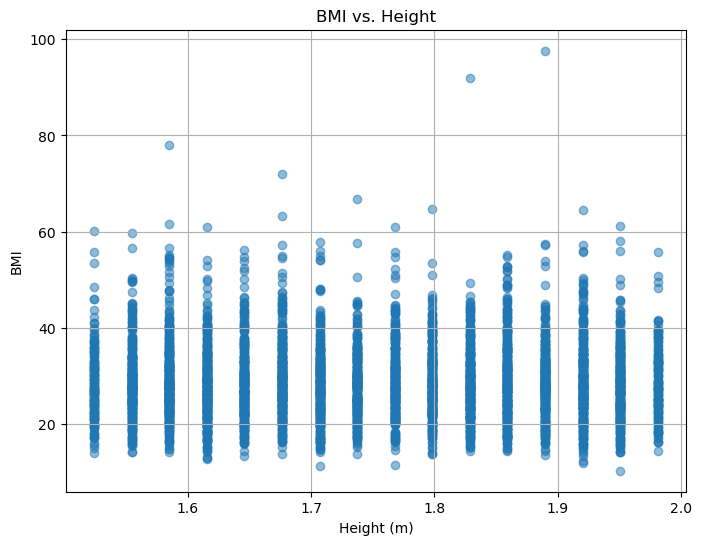

In [60]:
## write your code here
plt.figure(figsize=(8, 6))
plt.scatter(clean_df['height_in_m'], clean_df['bmi'], alpha=0.5)
plt.title('BMI vs. Height')
plt.xlabel('Height (m)')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

In [ ]:
## write your code here


In [ ]:
## write your code here


## Exploratory Data Analysis

- Univariate Analysis: Studying one variable at a time
- Bivariate Analysis: Studying two variables at a time
- Multivariate Analysis: Studying multiple variables at a time
- We need to investigate each feature properly

In [ ]:
## write your code here


## id feature

In [61]:
## write your code here
clean_df['id'].value_counts()

9046     1
57288    1
42251    1
51106    1
27518    1
        ..
42082    1
16953    1
63416    1
24782    1
44679    1
Name: id, Length: 4909, dtype: int64

## gender

In [62]:
## write your code here (check dtypes first)
clean_df['gender'].dtypes

dtype('O')

In [63]:
## write your code here
clean_df['gender'].value_counts()

Female    2850
Male      1966
female      47
male        45
Other        1
Name: gender, dtype: int64

In [64]:
## write your code here for calculating frequency count of gender column
clean_df['gender'] = clean_df['gender'].str.lower()

C:\Users\Kashyap Ghimire\AppData\Local\Temp\ipykernel_16852\1027332829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['gender'] = clean_df['gender'].str.lower()


In [65]:
clean_df['gender'].value_counts()

female    2897
male      2011
other        1
Name: gender, dtype: int64

In [66]:
## write your code here

#there is only 1 other field so other lai hataidine as there might me mistakes while recording the data
clean_df = clean_df.loc[clean_df['gender'] !='other']

In [67]:
clean_df['gender'].value_counts()

female    2897
male      2011
Name: gender, dtype: int64

## Create Piechart Or Bargraph For Univariate Analysis Of Categorical Feature

univariate analysis (categorical) -> bargraph, piechart

univariate analysis (numercial) -> distribution plot, kde plot, histogram, boxplot

bivariate plot (categorical) -> stacked bargraph, grouped bargrpah

bivariate plot(numerical) -> scatterplot, kdeplot

pairplot(multivariate) -> 3d plot, tensorboard embedding projector

In [69]:
print(clean_df['gender'].value_counts())

female    2897
male      2011
Name: gender, dtype: int64


In [71]:
gender_df = clean_df['gender'].value_counts().reset_index() #reset index is done to create two attributes for gender dataframe containing gender and count
#if yesto gareko thena vane gender ra count ko column nikalna milthena
gender_df

,index,gender
0,female,2897
1,male,2011


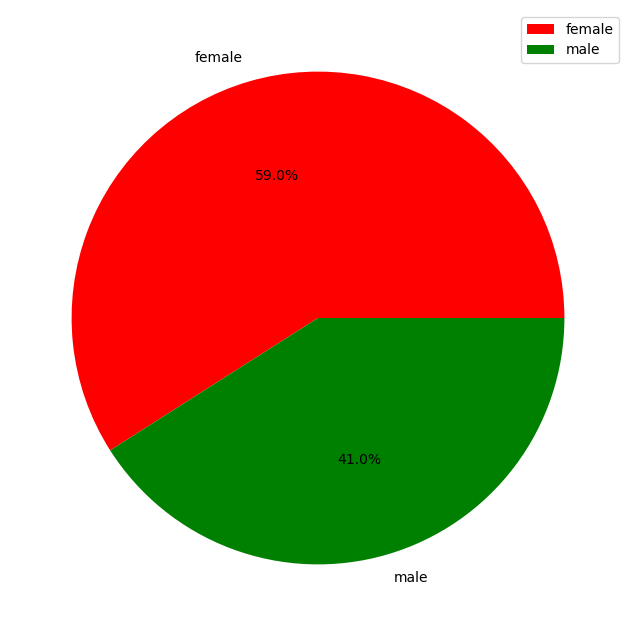

In [72]:
plt.figure(figsize = (12, 8))
plt.pie(gender_df['gender'], labels = gender_df['index'],
        colors = ['red', 'green'],
        autopct = "%.1f%%")
plt.legend()

<li>THere are 59% females and 41% males in the dataset.</li>

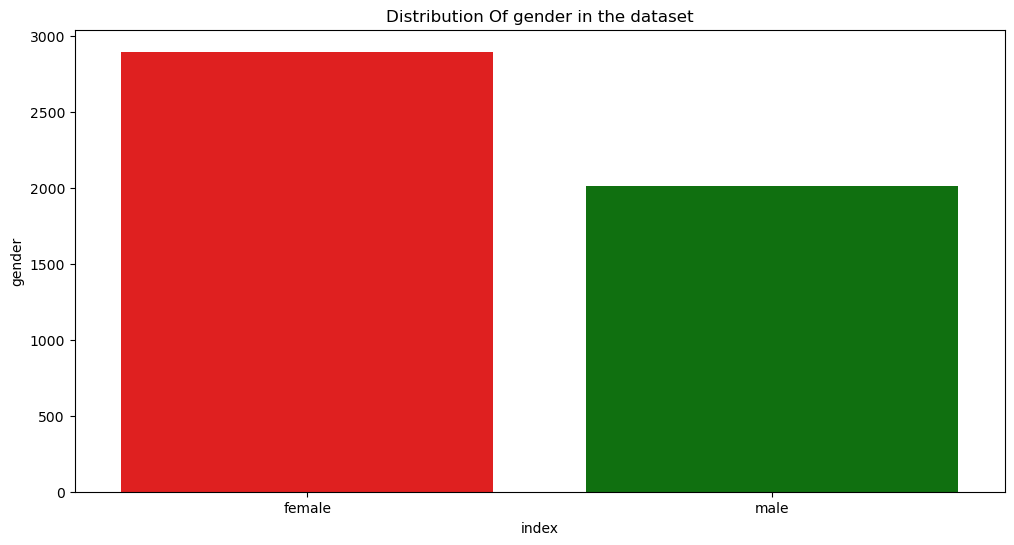

In [79]:
# in bar chart
plt.figure(figsize = (12,6))
sns.barplot(data = gender_df, x = 'index',
            y = 'gender',
            palette = ["red", 'green',])
plt.title("Distribution Of gender in the dataset")
plt.show()

## smoking status

In [80]:
## write your code here
clean_df['smoking_status'].value_counts()

never smoked       3335
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [81]:
#write your code here
#unknown is assumed to never smoke as smoking status='unknown' is only kept for children ie <18 years of age
clean_df.loc[clean_df['smoking_status'] == "Unknown", ["smoking_status"]] = "never smoked"


In [82]:
## write your code here
clean_df['smoking_status'].value_counts()

never smoked       3335
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [83]:
smoking_df = clean_df['smoking_status'].value_counts().reset_index()
smoking_df

,index,smoking_status
0,never smoked,3335
1,formerly smoked,836
2,smokes,737


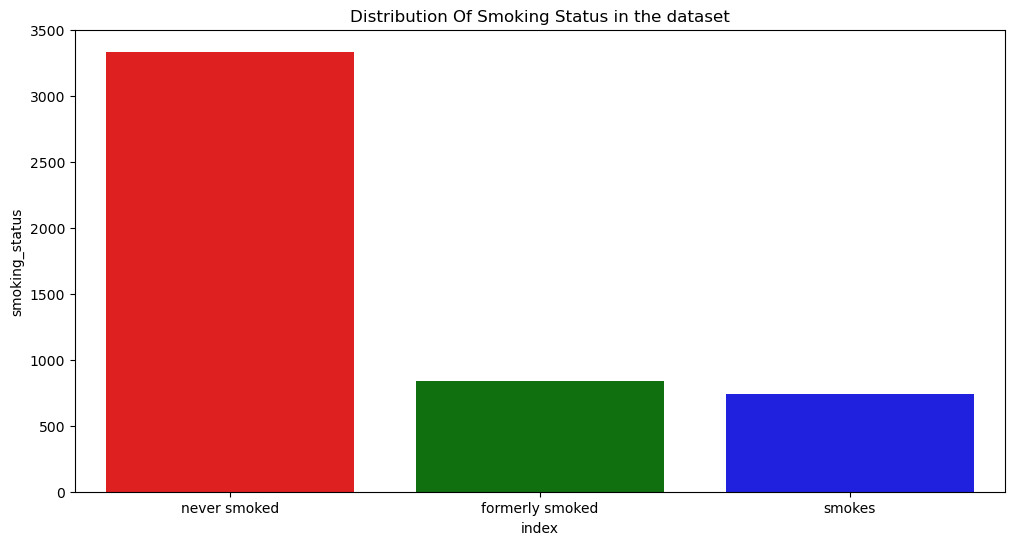

In [84]:
## write your code here
plt.figure(figsize = (12,6))
sns.barplot(data = smoking_df, x = 'index',
            y = 'smoking_status',
            palette = ["red", 'green', 'blue'])
plt.title("Distribution Of Smoking Status in the dataset")
plt.show()

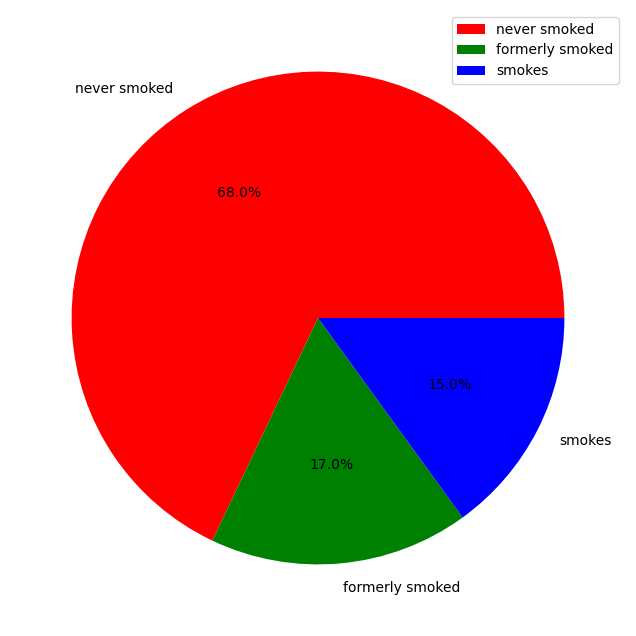

In [85]:
#pie chart 
plt.figure(figsize = (12, 8))
plt.pie(smoking_df['smoking_status'], labels = smoking_df['index'],
        colors = ['red', 'green','blue'],
        autopct = "%.1f%%")
plt.legend()

## Plot figure (Barchart)

In [86]:
## write your code here (use seaborn)


## hypertension

In [87]:
## write your code here
hypertension_df = clean_df['hypertension'].value_counts().reset_index()
hypertension_df

,index,hypertension
0,0,4457
1,1,451


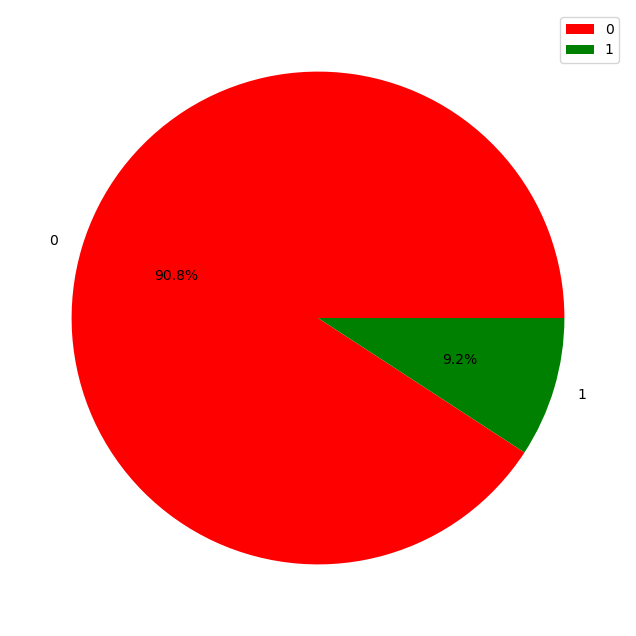

In [88]:
## write your code here (show graph)
plt.figure(figsize = (12, 8))
plt.pie(hypertension_df['hypertension'], labels = hypertension_df['index'],
        colors = ['red', 'green'],
        autopct = "%.1f%%")
plt.legend()

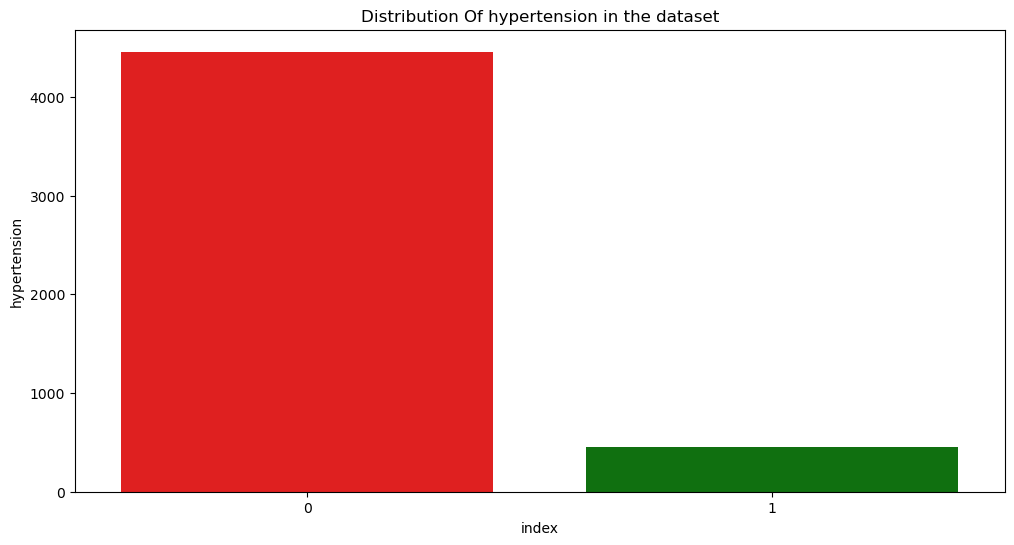

In [89]:
plt.figure(figsize = (12,6))
sns.barplot(data = hypertension_df, x = 'index',
            y = 'hypertension',
            palette = ["red", 'green'])
plt.title("Distribution Of hypertension in the dataset")
plt.show()

## stroke feature

In [90]:
## write your code here
stroke_df = clean_df['stroke'].value_counts().reset_index()
stroke_df

,index,stroke
0,0,4699
1,1,209


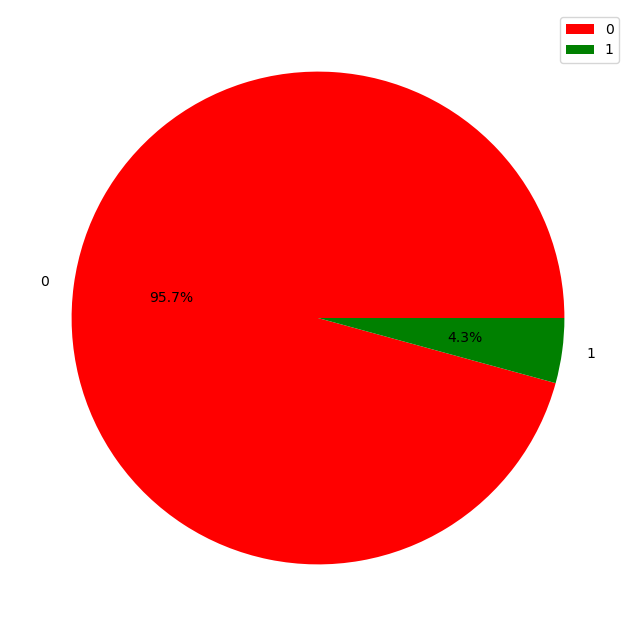

In [91]:
## write your code here(piechart)
plt.figure(figsize = (12, 8))
plt.pie(stroke_df['stroke'], labels = stroke_df['index'],
        colors = ['red', 'green'],
        autopct = "%.1f%%")
plt.legend()

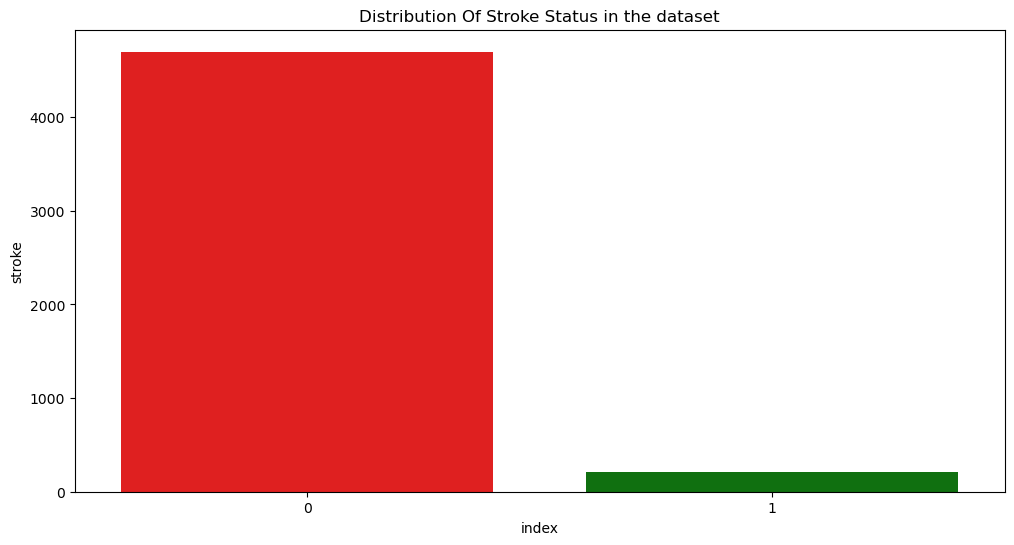

In [93]:
plt.figure(figsize = (12,6))
sns.barplot(data = stroke_df,x = 'index',
            y = 'stroke',
            palette = ["red", 'green'])
plt.title("Distribution Of Stroke Status in the dataset")
plt.show()

# Bivariate Analysis
## Is there a chance that patients with hypertension has more likely to get a stroke or not? (cross_tab function)


H0: There is no relationship between hypertension and stroke

H1: There is a strong relationship between hypertension and stroke

chisquare test ()

observe pvalue
if pvalue < 0.05 -> Accept  alternate hypotheses
else accept H0

In [94]:
#crosstab method is used to create a 2D table having information about data with every possible combination ie.
# hypertension xa stroke xa (1,1)
# hypertension xa stroke xaina (1,0)
# hypertension xaina stroke xa (0,1)
# hypertension xaina stroke xaina (0,0)
stroke_hypertension_df = pd.crosstab(clean_df['stroke'],
                                     clean_df['hypertension'])
stroke_hypertension_df


hypertension,0,1
stroke,,
0,4308,391
1,149,60


## Hypothesis Testing (Chisquare test for Independence)


chi2, p, dof, expected = chi2_contingency(stroke_hypertension_df)

In [95]:
#for chi squared test we need chi2_contigency method

In [96]:
from scipy.stats import chi2_contingency

In [98]:
# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(stroke_hypertension_df)
print(dof) #For a 2x2 table, the degrees of freedom would be (number of rows - 1) * (number of columns - 1).
print(p)

1
6.143875464115642e-23


Result:- There is a strong relation between stroke and hypertension

## Group Barplot

In [100]:
clean_df[['stroke', 'hypertension']].value_counts()

stroke  hypertension
0       0               4308
        1                391
1       0                149
        1                 60
dtype: int64

In [105]:
## write your code here
stroke_hypertension = clean_df[['stroke', 'hypertension']].value_counts().reset_index().rename(columns={0: 'counts'})
stroke_hypertension

,stroke,hypertension,counts
0,0,0,4308
1,0,1,391
2,1,0,149
3,1,1,60


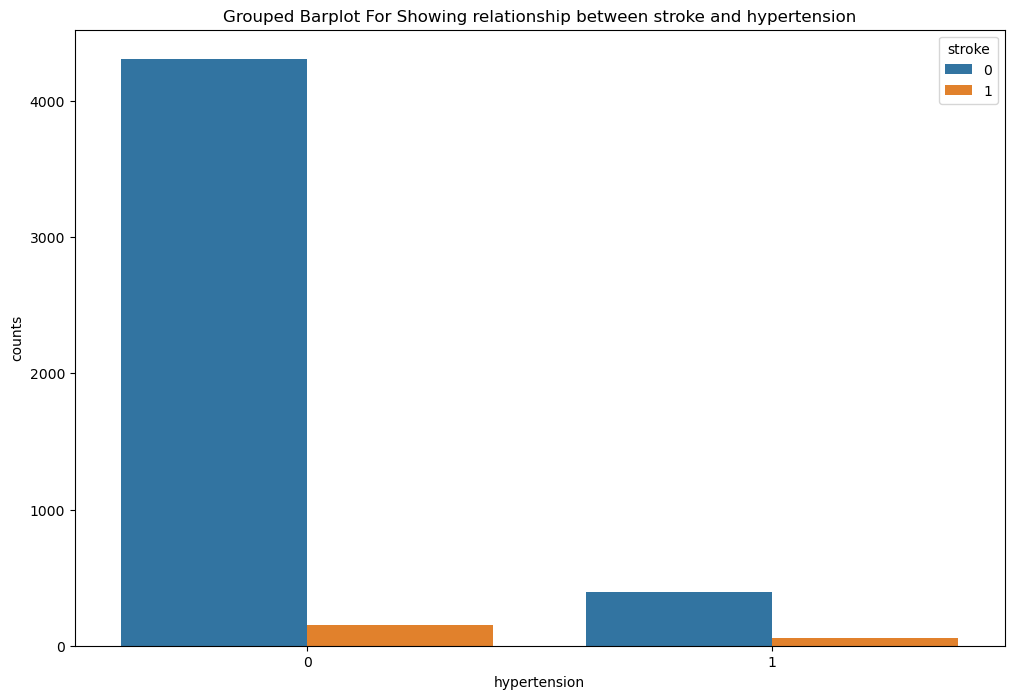

In [106]:
# Plot using Seaborn
plt.figure(figsize = (12, 8))
sns.barplot(data = stroke_hypertension, x = "hypertension",
            y = "counts",
            hue = "stroke")
plt.title("Grouped Barplot For Showing relationship between stroke and hypertension")
plt.show()


## heart disease

In [107]:
## write your code here
clean_df['heart_disease'].value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

In [108]:
## write your code here
heart_stroke = pd.crosstab(clean_df['stroke'], clean_df['heart_disease'])
heart_stroke

heart_disease,0,1
stroke,,
0,4496,203
1,169,40


## Hypothesis Testing (Chisquare test for Independence)


In [109]:
# Perform Chi-square test

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(heart_stroke)
print(dof)
print(p)
print(expected)

1
2.0990170036138994e-21
[[4466.34779951  232.65220049]
 [ 198.65220049   10.34779951]]


<li>Since, p value < 0.05, there is a strong relationship between heart disease and stroke.</li>

## Group Bar plot

In [112]:
## write your code here with long format table
heart_stroke_df = clean_df[['heart_disease', 'stroke']].value_counts().reset_index().rename(columns={0: 'counts'})

heart_stroke_df

,heart_disease,stroke,counts
0,0,0,4496
1,1,0,203
2,0,1,169
3,1,1,40


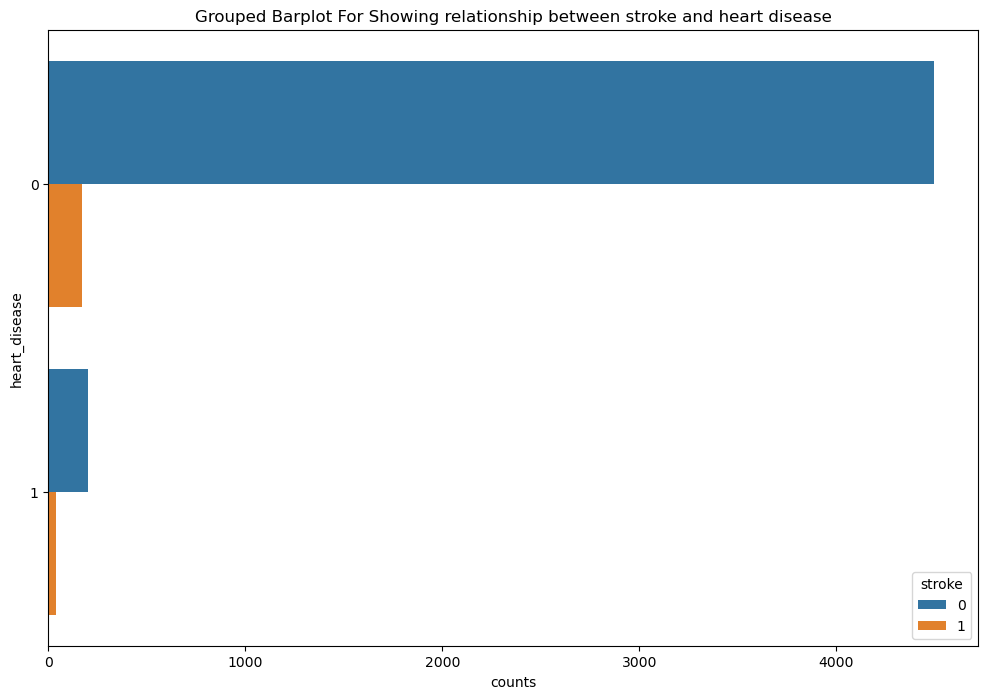

In [114]:
## write your code here
# Plot using Seaborn
plt.figure(figsize = (12, 8))
sns.barplot(data = heart_stroke_df, x = "counts" ,
            y = "heart_disease",
            hue = "stroke", orient = "horizontal")
plt.title("Grouped Barplot For Showing relationship between stroke and heart disease")
plt.show()


In [115]:
clean_df

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
2,31112,male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1
5,56669,male,81.0,1.79832,93.784690,169.35,29.0,formerly smoked,0,0,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,female,13.0,1.92024,68.584183,103.08,18.6,never smoked,0,0,No,children,Rural,0
5106,44873,female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5107,19723,female,35.0,1.82880,102.341989,82.99,30.6,never smoked,0,0,Yes,Self-employed,Rural,0
5108,37544,male,51.0,1.82880,85.619442,166.29,25.6,formerly smoked,0,0,Yes,Private,Rural,0


### for smoking status and stroke

In [116]:
stroke_smoke_df = pd.crosstab(clean_df['stroke'],
                                     clean_df['smoking_status'])
stroke_smoke_df

smoking_status,formerly smoked,never smoked,smokes
stroke,,,
0,779,3222,698
1,57,113,39


In [117]:
chi2, p, dof, expected = chi2_contingency(stroke_smoke_df)
print(dof) #For a 2x2 table, the degrees of freedom would be (number of rows - 1) * (number of columns - 1).
print(p)

2
2.0822585367754843e-05


as p value is less than 0.05 so h1 is accepted ie there is strong relation between stroke and smoking status

In [119]:
#preparing data for bar graphh
smoke_stroke_df = clean_df[['smoking_status', 'stroke']].value_counts().reset_index().rename(columns={0: 'counts'})

smoke_stroke_df

,smoking_status,stroke,counts
0,never smoked,0,3222
1,formerly smoked,0,779
2,smokes,0,698
3,never smoked,1,113
4,formerly smoked,1,57
5,smokes,1,39


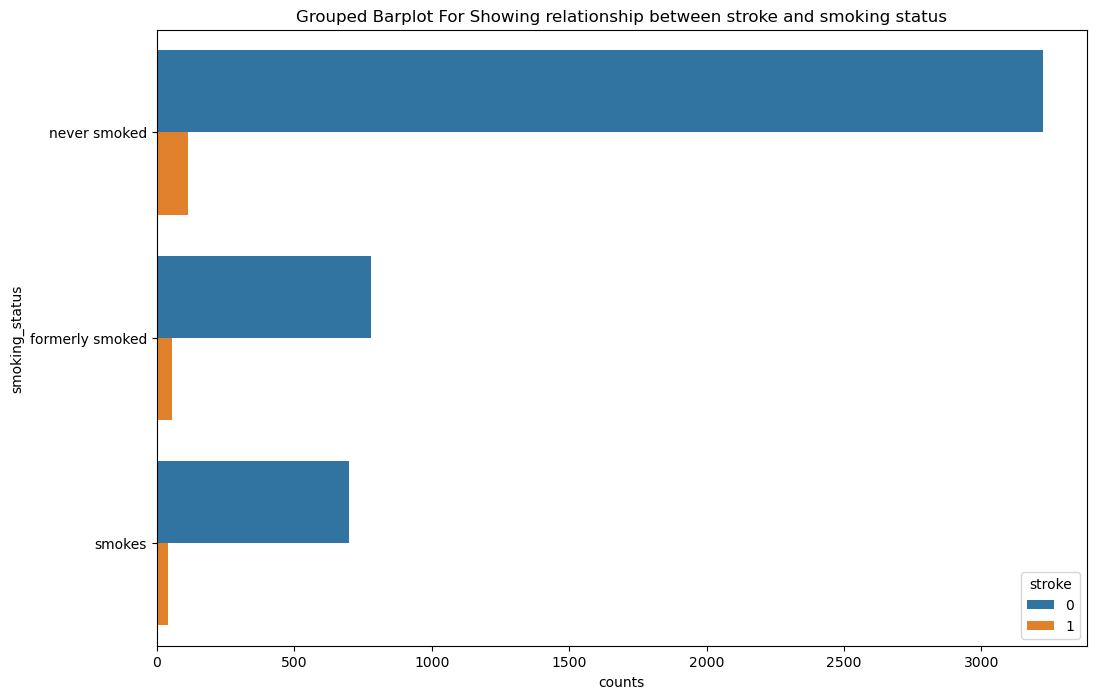

In [122]:
plt.figure(figsize = (12, 8))
sns.barplot(data = smoke_stroke_df, x = "counts" ,
            y = "smoking_status",
            hue = "stroke", orient = "horizontal")
plt.title("Grouped Barplot For Showing relationship between stroke and smoking status")
plt.show()



### for ever married and stroke

In [123]:
stroke_married_df=pd.crosstab(clean_df['stroke'],clean_df['ever_married'])
stroke_married_df

ever_married,No,Yes
stroke,,
0,1626,3073
1,23,186


In [131]:
#chi2 test
chi2,p,dof,expected=chi2_contingency(stroke_married_df)
print(chi2,p,dof)

48.89531858700002 2.699943987742315e-12 1


as p value is less than 0.05 so h1 is accepted ie there is strong relation between stroke and marriage status

In [132]:
married_stroke_df=clean_df[['stroke','ever_married']].value_counts().reset_index().rename(columns = {0:'Counts'})
married_stroke_df

,stroke,ever_married,Counts
0,0,Yes,3073
1,0,No,1626
2,1,Yes,186
3,1,No,23


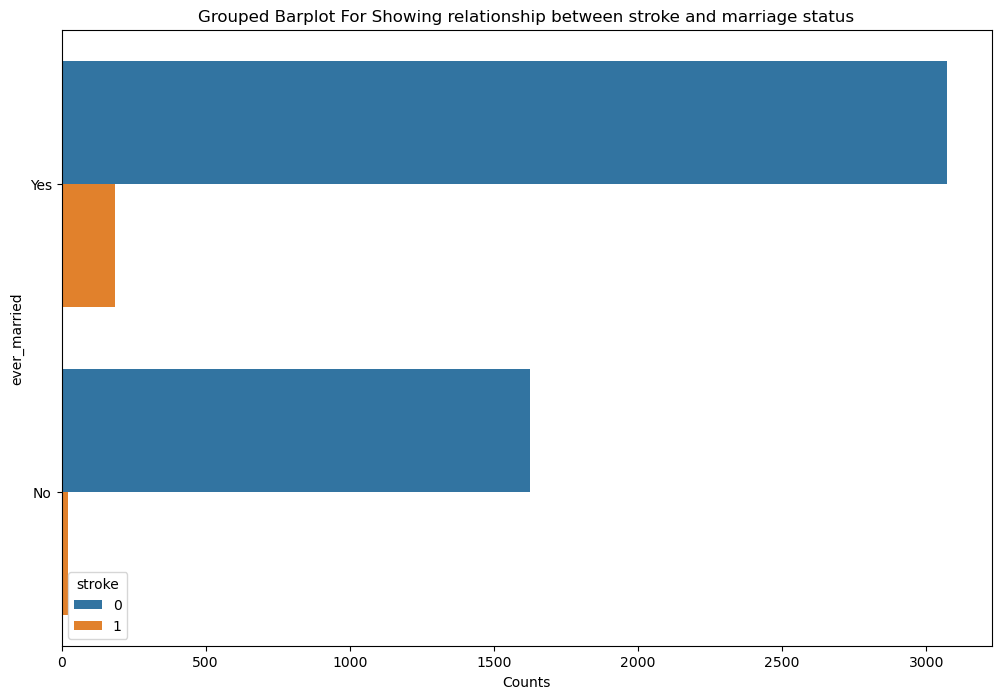

In [133]:
plt.figure(figsize = (12, 8))
sns.barplot(data = married_stroke_df, x = "Counts" ,
            y = "ever_married",
            hue = "stroke", orient = "horizontal")
plt.title("Grouped Barplot For Showing relationship between stroke and marriage status")
plt.show()


## Numerical Features

In [134]:
# select numerical features
## write your code here
clean_df.select_dtypes('number')

,id,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,9046,67.0,1.82880,122.409046,169.35,36.6,0,1,1
2,31112,80.0,1.79832,105.103532,105.92,32.5,0,1,1
3,60182,49.0,1.92024,126.843865,169.35,34.4,0,0,1
4,1665,79.0,1.85928,82.966131,169.35,24.0,1,0,1
5,56669,81.0,1.79832,93.784690,169.35,29.0,0,0,1
...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,1.92024,68.584183,103.08,18.6,0,0,0
5106,44873,81.0,1.88976,142.847714,125.20,40.0,0,0,0
5107,19723,35.0,1.82880,102.341989,82.99,30.6,0,0,0
5108,37544,51.0,1.82880,85.619442,166.29,25.6,0,0,0


## age column

(array([422., 356., 431., 469., 576., 564., 668., 529., 376., 517.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

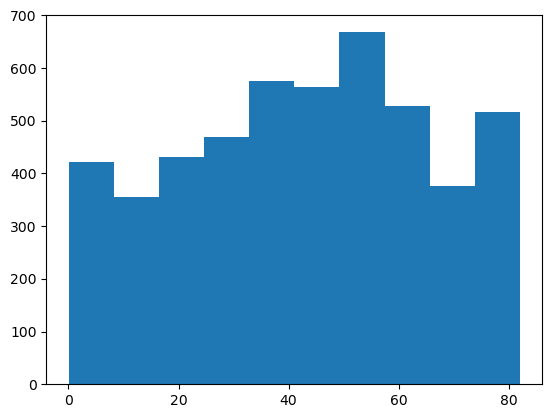

In [135]:
## write your code here (for histogram)
plt.hist(clean_df['age'])

<Axes: xlabel='age', ylabel='Count'>

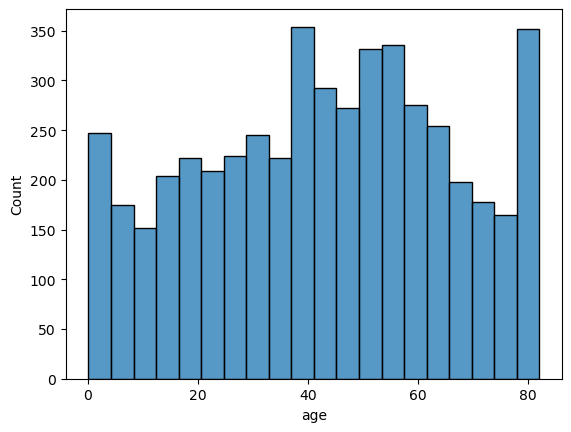

In [136]:
sns.histplot(clean_df['age'])

<Axes: xlabel='age', ylabel='Density'>

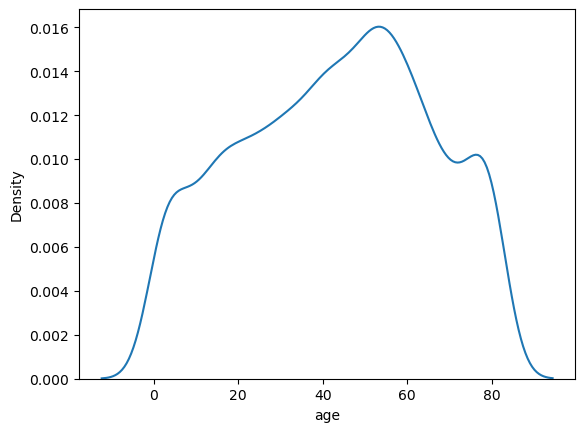

In [137]:
## write your code here (for kde plot)
sns.kdeplot(clean_df['age'])

In [138]:
clean_df['age'].mean()

42.86881010594947

In [139]:
clean_df['age'].median()

44.0

<Axes: >

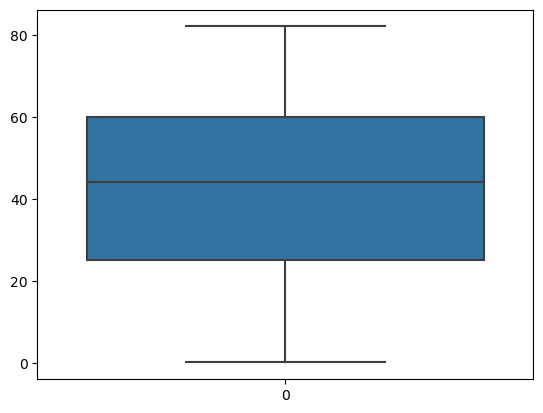

In [140]:
## write your code here (for outlier analysis using boxplot)
sns.boxplot(clean_df['age'])

In [ ]:
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# higher = Q3 + 1.5 * IQR

## Bmi column

<Axes: xlabel='bmi', ylabel='Density'>

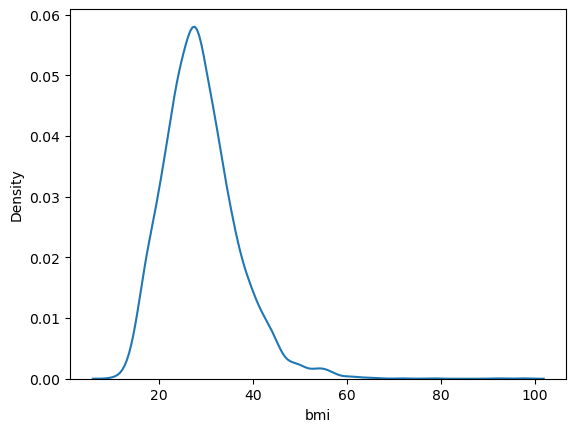

In [141]:
## write your code here (for histogram)
sns.kdeplot(clean_df['bmi'])

In [142]:
## write your code here (for kde plot)
clean_df['bmi'].mean()

28.894559902200488

In [143]:
clean_df['bmi'].median()

28.1

In [ ]:
## write your code here (for boxplot outlier analysis)


## glucose level

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

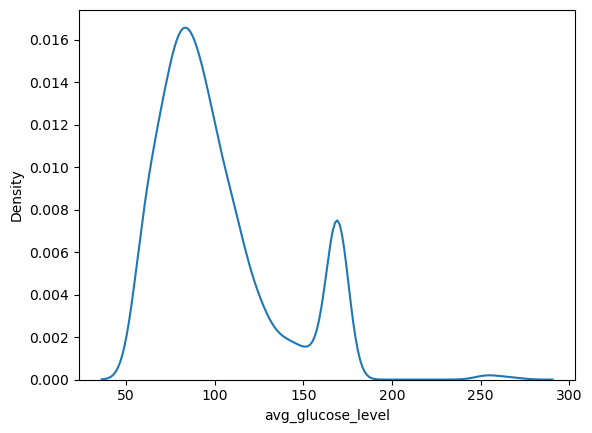

In [144]:
sns.kdeplot(clean_df['avg_glucose_level'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

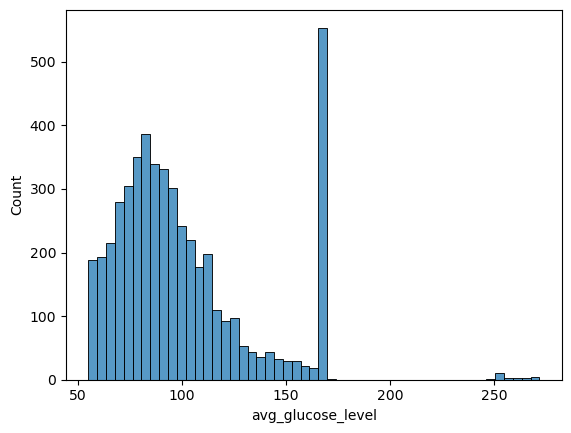

In [145]:
sns.histplot(clean_df['avg_glucose_level'])

In [146]:
clean_df['avg_glucose_level'].mean()

100.86713528932354

In [147]:
clean_df['avg_glucose_level'].median()

91.68

In [181]:
import plotly.express as px
fig = px.box(clean_df['avg_glucose_level'])
fig.show()

<Axes: >

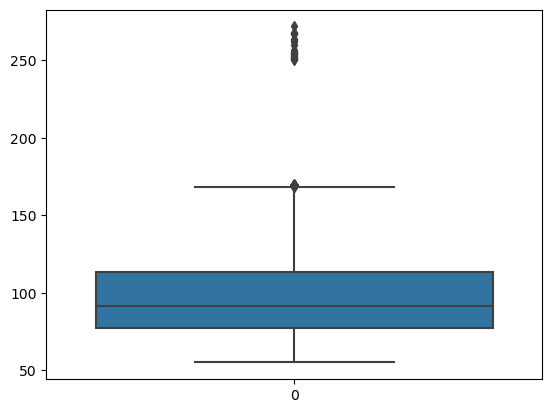

In [148]:
sns.boxplot(clean_df['avg_glucose_level'])


this shows that there is presence of outliers this outliers should be removed

In [172]:
#for removing outliers,
Q1 = clean_df['avg_glucose_level'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = clean_df['avg_glucose_level'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
new_clean_df = clean_df[(clean_df['avg_glucose_level'] >= lower_bound) & (clean_df['avg_glucose_level'] <= upper_bound)]
print(f"{column}:- Lower limit={lower_bound}, Upper limit={upper_bound}")

avg_glucose_level:- Lower limit=22.426249999999982, Upper limit=168.13625000000002


In [177]:
new_clean_df['avg_glucose_level'].min()

55.12

In [178]:
new_clean_df['avg_glucose_level'].mean()

91.41746715833142

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

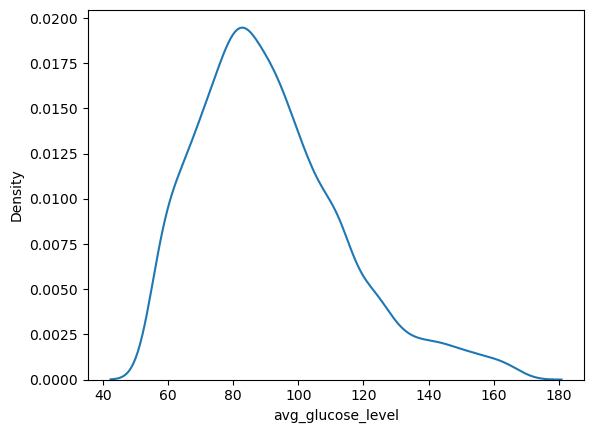

In [179]:
#checking if outliers are removed or not
sns.kdeplot(new_clean_df['avg_glucose_level'])

In [180]:
import plotly.express as px
fig = px.box(new_clean_df['avg_glucose_level'])
fig.show()


In [171]:
new_clean_df

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
2,31112,male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
6,53882,male,74.0,1.88976,97.850684,70.09,27.4,never smoked,1,1,Yes,Private,Rural,1
7,10434,female,69.0,1.61544,59.499938,94.39,22.8,never smoked,0,0,No,Private,Urban,1
9,60491,female,78.0,1.98120,94.988713,58.57,24.2,never smoked,0,0,Yes,Private,Urban,1
10,12109,female,81.0,1.95072,113.017663,80.43,29.7,never smoked,1,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,female,13.0,1.92024,68.584183,103.08,18.6,never smoked,0,0,No,children,Rural,0
5106,44873,female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5107,19723,female,35.0,1.82880,102.341989,82.99,30.6,never smoked,0,0,Yes,Self-employed,Rural,0
5108,37544,male,51.0,1.82880,85.619442,166.29,25.6,formerly smoked,0,0,Yes,Private,Rural,0


the outliers have been removed

### Hypothesis Test For Normality


# Perform Kolmogorov-Smirnov test
statistic, pvalue = kstest(final_df['bmi'], 'norm')

# Print the result
print("Kolmogorov-Smirnov Test Statistic:", statistic)

print("p-value:", pvalue)

# Interpret the results
alpha = 0.05  # Significance level

if pvalue > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
    
else:
    print("Sample does not look Gaussian (reject H0)")


In [183]:
from scipy.stats import kstest, shapiro

# if n < 100 -> shapiro test
# If n > 100 -> use kstest

In [184]:
statistic, pvalue = kstest(new_clean_df['bmi'], 'norm')
print("p-value", pvalue)

p-value 0.0


In [185]:
# Accept H1 (normal distribution bata ako haina)

In [ ]:
# # bmi - 0, 1 (t test)
# from scipy.stats import ttest_ind

# # Assuming 'sample1' and 'sample2' are your two samples as lists, arrays, or Series
# t_statistic, p_value = ttest_ind(sample1, sample2)

# # Printing the t-statistic and p-value
# print("t-statistic:", t_statistic)
# print("p-value:", p_value)



## Scatterplots

Text(0.5, 1.0, 'Relationship between age, bmi and stroke probability')

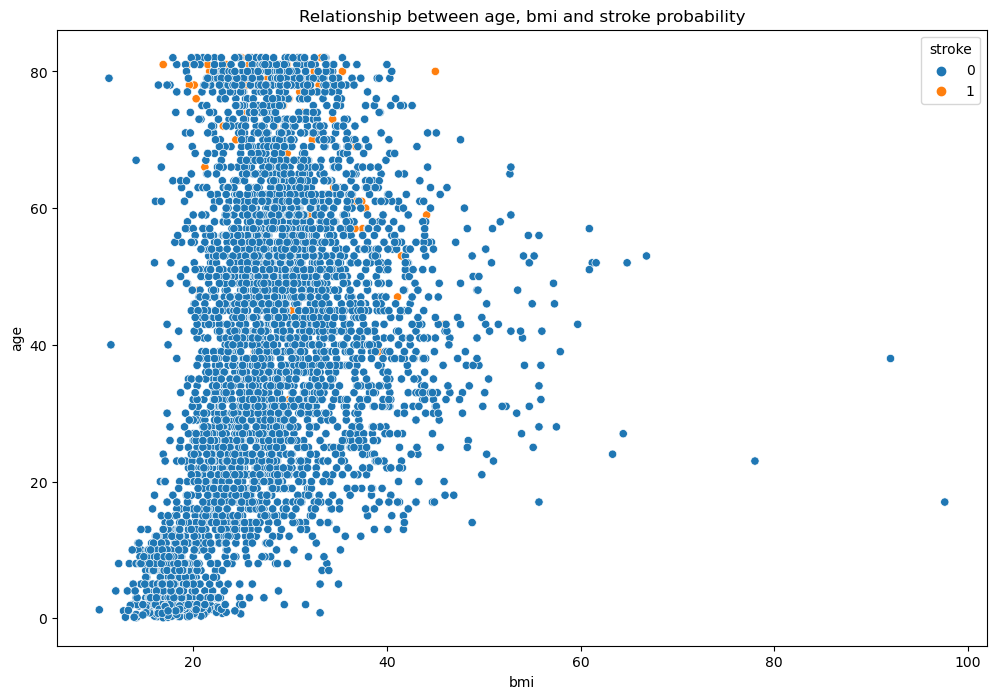

In [186]:
## write your code here
plt.figure(figsize = (12, 8))
sns.scatterplot(data = new_clean_df,
                x = "bmi",
                y = "age",
                hue = "stroke")
plt.title("Relationship between age, bmi and stroke probability")

## Correlation Plots and Heatmaps

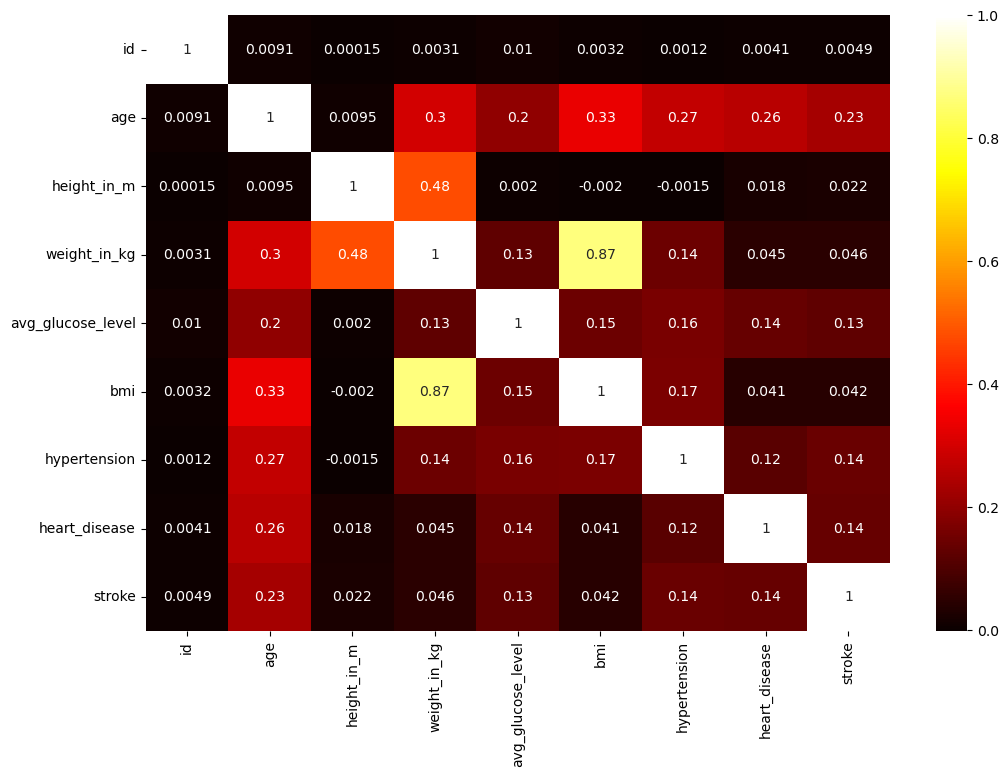

In [187]:
## write your code here
plt.figure(figsize = (12, 8))
sns.heatmap(clean_df.select_dtypes('number').corr(), cmap = 'hot',
            annot = True)
plt.show()

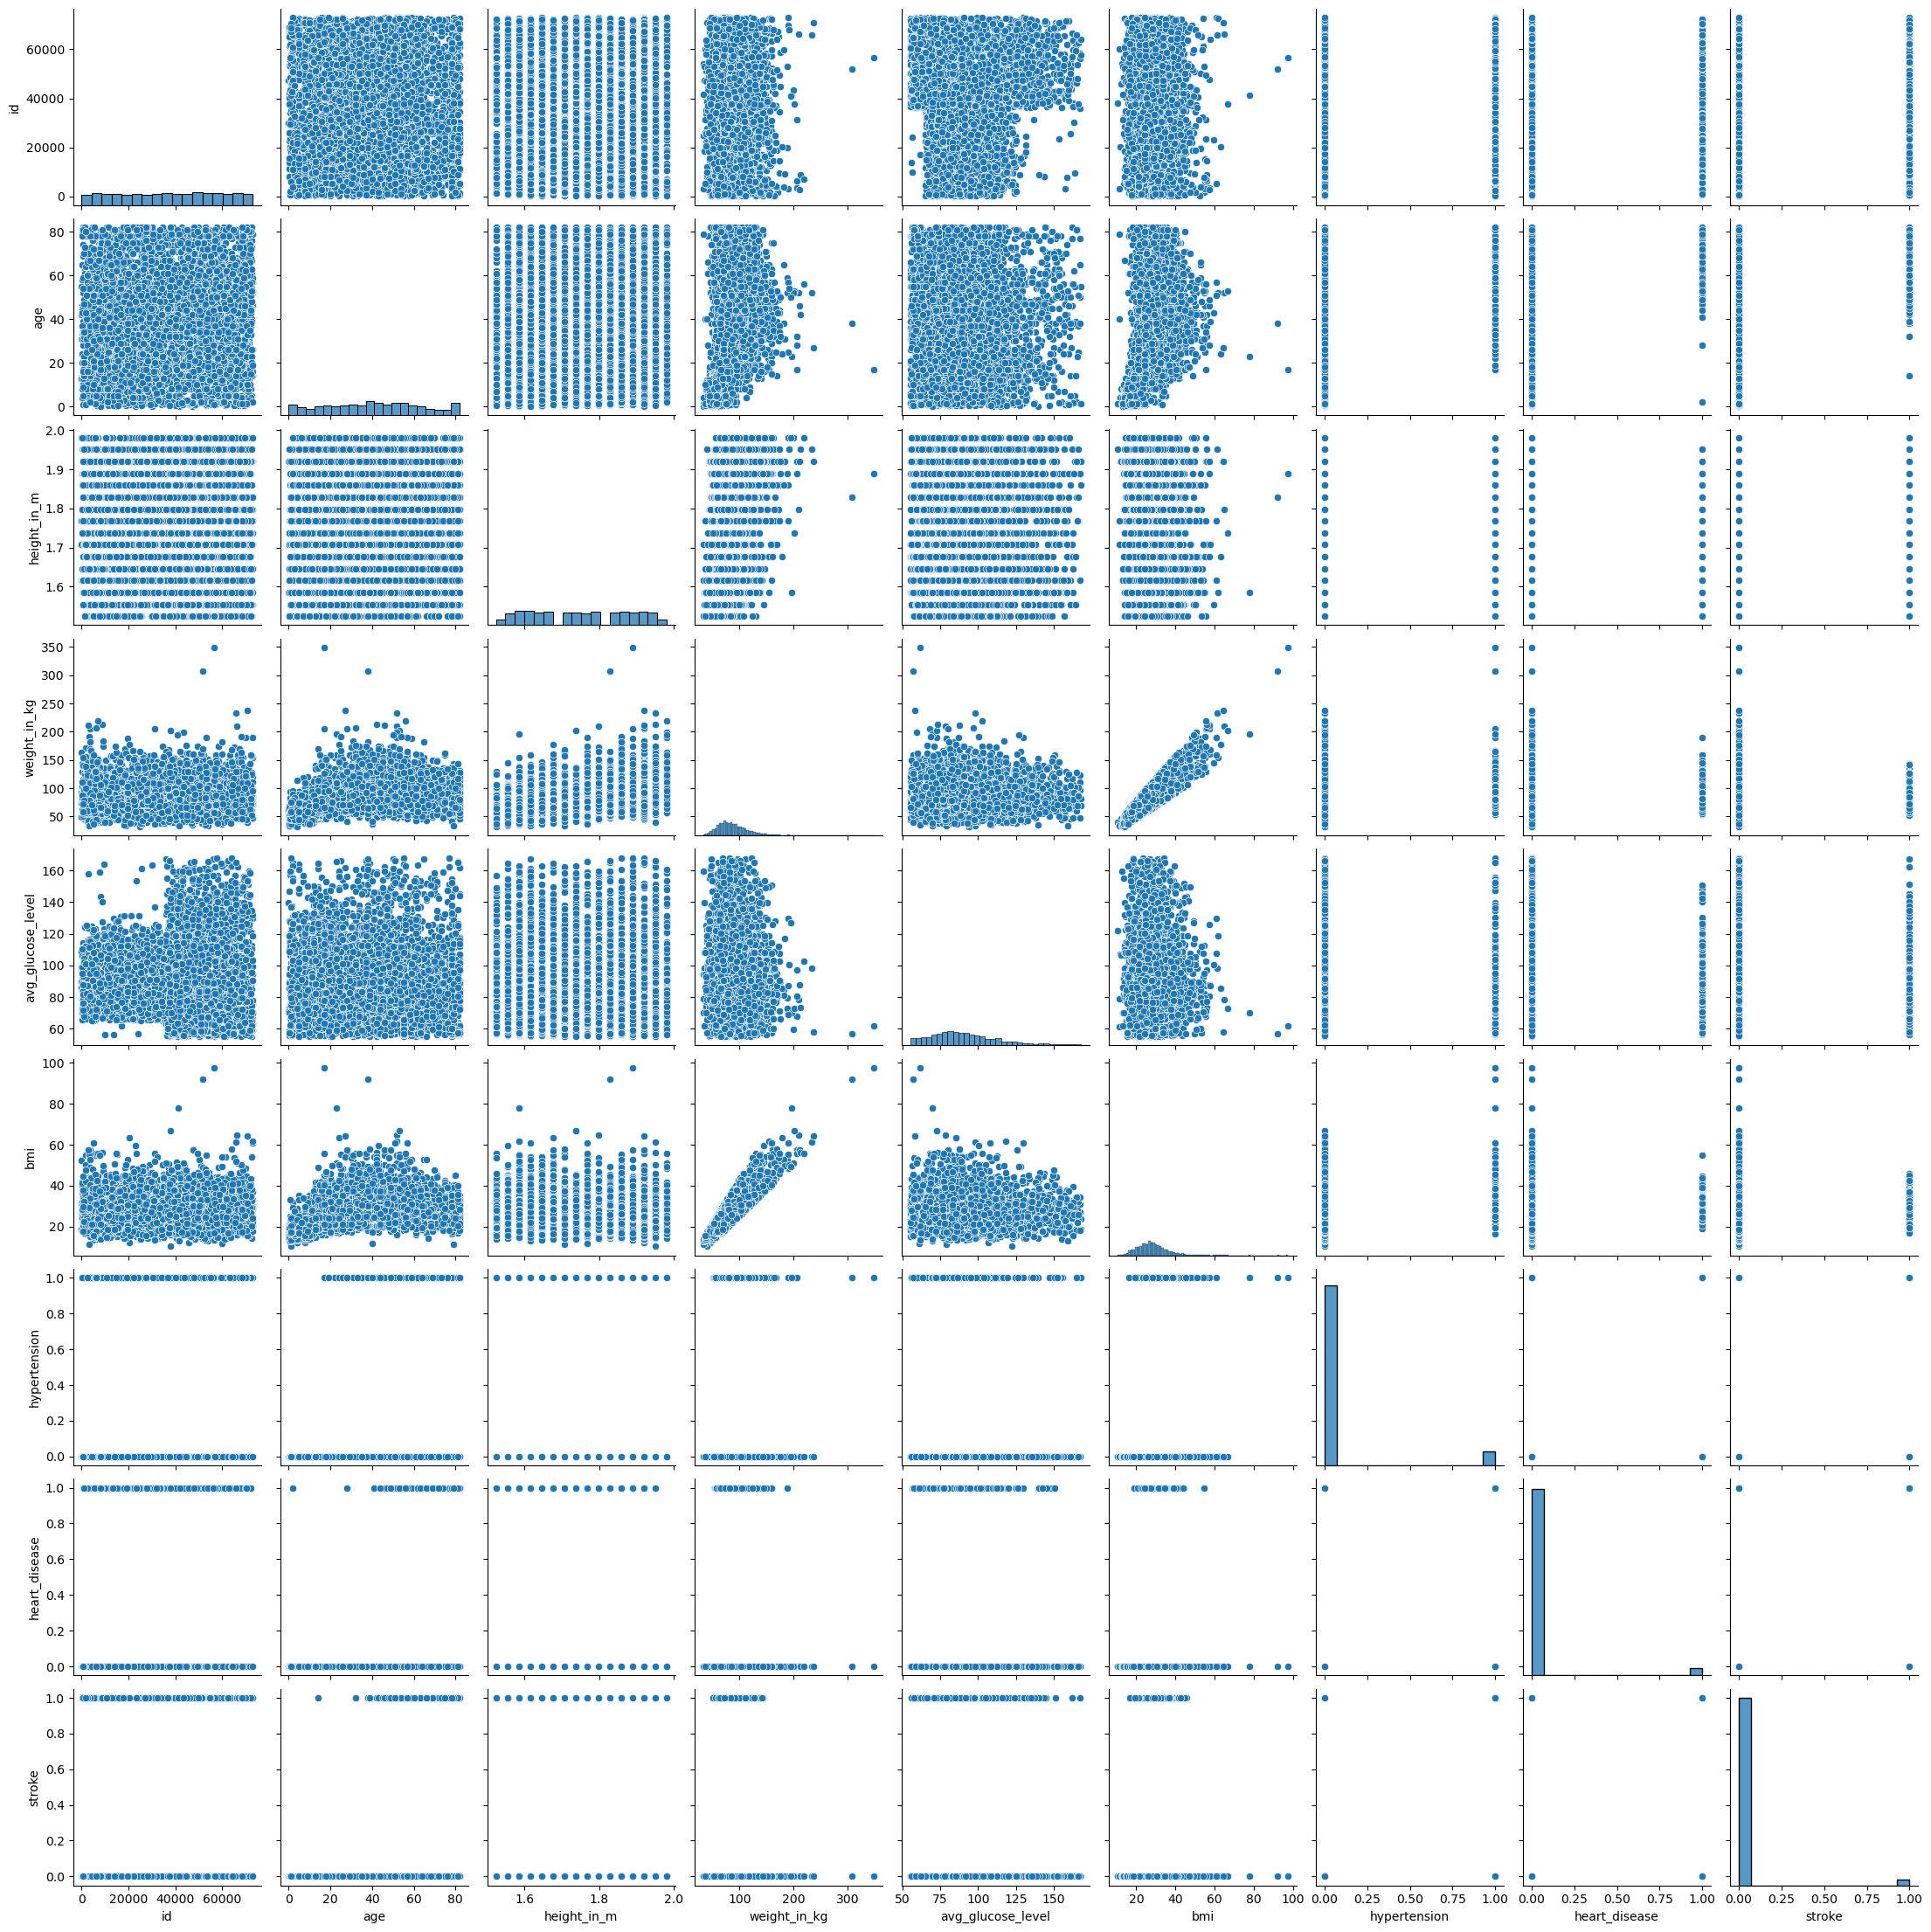

In [188]:
sns.pairplot(new_clean_df)